# 1. Data understanding and preparation

The aim of this part is to extract some important features from the table `Laboratory_events`, in order to build insights for the patient profile. 
This notebook is divided in two parts: 
<ul>
    <li><b>Data understanding</b></li>
    <li><b>Data Preparation</b></li>
</ul>

Before diving into the further steps, ensure to have installed the data analitycs libraries: 

In [35]:
%conda install pandas seaborn scipy

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.9.1
    latest version: 25.11.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


## 1.1 Data understanding

### 1.1.2 Load the dataset

read the `.csv` file we need for the **DU**. 

In [36]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path

notebook_dir = Path().resolve()
LAB_CODES_PATH = notebook_dir.parents[1] / "Data" / "laboratory_events_codes_2.csv"
df = pd.read_csv(LAB_CODES_PATH)

### 1.1.3 Semantic understanding of features
Printing general about the dataFrame `df`

In [37]:
df.shape

(978503, 14)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   hadm_id            978503 non-null  float64
 1   charttime          978503 non-null  object 
 2   value              934025 non-null  object 
 3   valuenum           907317 non-null  float64
 4   valueuom           884585 non-null  object 
 5   ref_range_lower    865544 non-null  float64
 6   ref_range_upper    865544 non-null  float64
 7   flag               343687 non-null  object 
 8   label              978503 non-null  object 
 9   fluid              978503 non-null  object 
 10  examination_group  978503 non-null  object 
 11  analysis_batch_id  978503 non-null  object 
 12  qc_flag            978503 non-null  object 
 13  ref_range          146215 non-null  object 
dtypes: float64(4), object(10)
memory usage: 104.5+ MB


In [39]:
df.describe(include="all")

,hadm_id,charttime,value,valuenum,valueuom,ref_range_lower,ref_range_upper,flag,label,fluid,examination_group,analysis_batch_id,qc_flag,ref_range
count,9.785030e+05,978503,934025,907317.000000,884585,865544.000000,865544.000000,343687,978503,978503,978503,978503,978503,146215
unique,NaN,66403,4284,NaN,47,NaN,NaN,1,502,9,202,227052,3,3
top,NaN,2172-04-23 08:45:00,___,NaN,mg/dL,NaN,NaN,abnormal,Glucose,Blood,Complete Blood Count (CBC),BATCH_217602_T1,OK,Normal range: 10-20
freq,NaN,93,68645,NaN,229227,NaN,NaN,343687,39744,918188,286407,39,880809,49098
mean,2.504395e+07,NaN,NaN,67.332325,NaN,31.724619,55.794861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.868159e+06,NaN,NaN,2175.589189,NaN,44.840840,400.515033,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.000446e+07,NaN,NaN,-743.000000,NaN,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.261232e+07,NaN,NaN,4.300000,NaN,3.300000,5.400000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.510567e+07,NaN,NaN,17.000000,NaN,10.400000,20.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.749772e+07,NaN,NaN,60.200000,NaN,36.000000,52.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 1.2. Data Preparation

In [40]:
string_cols = [
    "label", "fluid", "examination_group", "analysis_batch_id" "qc_flag",
]

In [41]:
for col in string_cols:
    if col in df.columns:
        print(f"\n---- Column: {col} ----")
        print("Sample unique values BEFORE cleaning:")
        print(df[col].dropna().unique()[:10])  # show first 10


---- Column: label ----
Sample unique values BEFORE cleaning:
['Creatine Kinase (CK)' 'Creatine Kinase, MB Isoenzyme' 'Troponin T'
 'INR(PT)' 'PT' 'PTT' '% Hemoglobin A1c' 'eAG' 'Anion Gap' 'Bicarbonate']

---- Column: fluid ----
Sample unique values BEFORE cleaning:
['Blood' 'Urine' 'Other Body Fluid' 'Pleural' 'Ascites'
 'Cerebrospinal Fluid' 'Stool' 'Joint Fluid' 'Bone Marrow']

---- Column: examination_group ----
Sample unique values BEFORE cleaning:
['Cardiac Markers' 'Coagulation and Hemostasis' 'HbA1c'
 'Renal Function Tests' 'BMP' 'Lipid Panel' 'Complete Blood Count (CBC)'
 'Liver Function Tests' 'Amylase' 'Vitamin and Nutritional Studies']


In [42]:
for col in string_cols:
    if col in df.columns:
        # Convert to string
        col_series = df[col].astype('string')
        # Find rows with leading/trailing spaces
        bad_spaces = df[col_series.str.contains(r"^\s+|\s+$", na=False)]
        # Count only non-NaN rows
        non_na_total = col_series.notna().sum()
        print(f"\n{col}: Rows with leading/trailing spaces = {len(bad_spaces)} / {non_na_total} (non-empty rows)")
        # Fix by stripping spaces
        df[col] = col_series.str.strip()


label: Rows with leading/trailing spaces = 0 / 978503 (non-empty rows)

fluid: Rows with leading/trailing spaces = 0 / 978503 (non-empty rows)

examination_group: Rows with leading/trailing spaces = 0 / 978503 (non-empty rows)


In [43]:
# ---- 6. qc_flag: check unique values ----
expected_qc_flag = {'OK', 'WARN', 'FAIL'}
unexpected_qc_flag = df[
    (~df["qc_flag"].isin(expected_qc_flag)) & 
    df["qc_flag"].notna()
]
print(f"\nUnexpected quality check flag labels: {len(unexpected_qc_flag)}")
if len(unexpected_qc_flag) > 0:
    display(unexpected_qc_flag.head())


Unexpected quality check flag labels: 0


In [44]:
#Chartime transformation 
df['charttime'] = pd.to_datetime(df['charttime'], errors='coerce')

In [45]:
df['hadm_id'] = df['hadm_id'].astype('int64')

In [46]:
df['value'] = df['value'].replace(['-', '--', '', ' '], np.nan)
df['value'] = (
    df['value']
    .str.replace('<', '', regex=False)
    .str.replace('>', '', regex=False)
)
df['value'] = pd.to_numeric(df['value'], errors='coerce')
df['value'] = df['value'].astype('float64')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978503 entries, 0 to 978502
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978503 non-null  int64         
 1   charttime          978503 non-null  datetime64[ns]
 2   value              839422 non-null  float64       
 3   valuenum           907317 non-null  float64       
 4   valueuom           884585 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               343687 non-null  object        
 8   label              978503 non-null  string        
 9   fluid              978503 non-null  string        
 10  examination_group  978503 non-null  string        
 11  analysis_batch_id  978503 non-null  object        
 12  qc_flag            978503 non-null  object        
 13  ref_range          146215 non-null  object  

### 1.2.1 Data cleaning

#### 1.2.1.1 Handle duplicated records

In [48]:
print(f"Before: {df.shape}")
df = df.drop_duplicates()
print(f"After: {df.shape}")

Before: (978503, 14)
After: (978501, 14)


#### 1.2.2.2 Missing values
We estimate the percentage of *missing values* contained in each column. 

In [49]:
df.isna().mean().sort_values(ascending=False)

ref_range            0.850572
flag                 0.648762
value                0.142135
ref_range_upper      0.115439
ref_range_lower      0.115439
valueuom             0.095979
valuenum             0.072748
charttime            0.000000
hadm_id              0.000000
label                0.000000
fluid                0.000000
examination_group    0.000000
analysis_batch_id    0.000000
qc_flag              0.000000
dtype: float64

We can create a bar chart that reports the number of missing values in each variable 

/tmp/ipykernel_72353/4090193844.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')


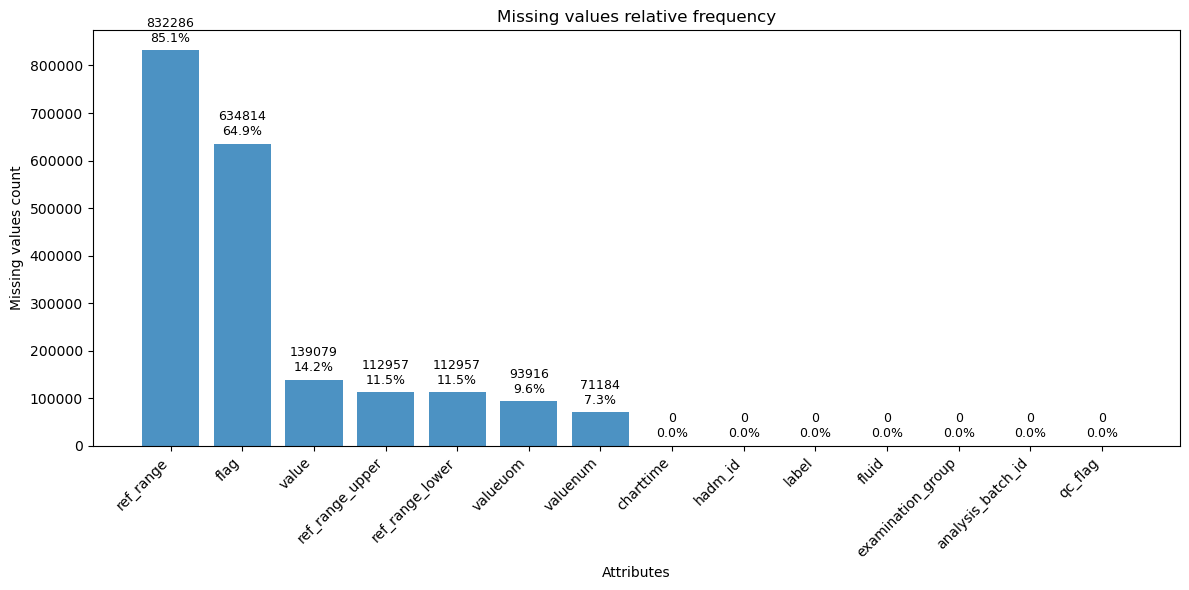

In [50]:
# Bar chart dei missing values per colonna (frequenza e percentuale)
missing_counts = df.isnull().sum()
total = len(df)
missing_counts = missing_counts.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(missing_counts.index, missing_counts.values, color='tab:blue', alpha=0.8)
ax.set_title("Missing values relative frequency")
ax.set_xlabel("Attributes")
ax.set_ylabel("Missing values count")
ax.set_xticklabels(missing_counts.index, rotation=45, ha='right')
for bar, count in zip(bars, missing_counts.values):
    pct = count / total * 100
    ax.annotate(f"{count}\n{pct:.1f}%",
                xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),
                xytext=(0, 4), textcoords="offset points",
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

From this bar chart we can now see that the `flag` and `ref_range` attributes have a lot of missing values. 
Let's have a look at them.


`flag` transformation

In [51]:
df['flag'].value_counts()

flag
abnormal    343687
Name: count, dtype: int64

We can replace the `abnormal` with a 1, and the rest of the fields we put a 0 which indicates that the test is not abnormal.

In [52]:
df['flag'] = df['flag'].str.strip().str.lower()
df['flag'] = df['flag'].apply(lambda x: 1 if x == 'abnormal' else 0)
df['flag'].value_counts()

flag
0    634814
1    343687
Name: count, dtype: int64

`ref_range` elimination

This variable has ~80% of values missing. <br>
Moreover, we can observe that there isn't coerence between the values of `ref_range_lower`, `ref_range_upper` and `ref_range`. <br>
Therefore, we can drop the column `ref_range` because it has already a big percentage of missing values.

In [53]:
ref_range_not_null = df[df['ref_range'].notna()][['ref_range', 'ref_range_lower', 'ref_range_upper']]
ref_range_not_null.head()

,ref_range,ref_range_lower,ref_range_upper
6,Normal range: 70-110,4.8,5.9
10,Normal range: 10-20,8.4,10.3
21,Normal range: 3-5,2.7,4.5
29,Normal range: 3-5,27.0,32.0
32,Normal range: 70-110,150.0,440.0


In [54]:
df.drop(columns=['ref_range'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 978501 entries, 0 to 978502
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   hadm_id            978501 non-null  int64         
 1   charttime          978501 non-null  datetime64[ns]
 2   value              839422 non-null  float64       
 3   valuenum           907317 non-null  float64       
 4   valueuom           884585 non-null  object        
 5   ref_range_lower    865544 non-null  float64       
 6   ref_range_upper    865544 non-null  float64       
 7   flag               978501 non-null  int64         
 8   label              978501 non-null  string        
 9   fluid              978501 non-null  string        
 10  examination_group  978501 non-null  string        
 11  analysis_batch_id  978501 non-null  object        
 12  qc_flag            978501 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), objec

`valuenum` and `valueuom` correction

Let's assume we have tests that can provide useful information (insights). To infer metrics, we need to discard tests that don't have a valid `valuenum` numerical value.

In [55]:
df = df.dropna(subset=['valuenum'])
df['valuenum'].isna().mean()

np.float64(0.0)

The type of test is recognized only by the label, the type of fluid analyzed and the unit of measurement. <br>
The `valueuom` can be inferred with the type of the test (`label` and `fluid`)

In [56]:
import numpy as np
import pandas as pd

# --- 0) Pre-cleaning (utile)
df['valueuom'] = df['valueuom'].astype(object)  
df['valueuom'] = df['valueuom'].str.strip().replace({'': np.nan})  

# --- 1) (label, fluid): mode per unique tests
modes_lf = (
    df.dropna(subset=['valueuom'])  
      .groupby(['label', 'fluid'])['valueuom']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
      .reset_index()
      .rename(columns={'valueuom': 'mode_uom'})
)

map_lf = { (r['label'], r['fluid']): r['mode_uom'] for _, r in modes_lf.iterrows() }

def fill_uom_by_label_fluid(row):
    if pd.notna(row['valueuom']):
        return row['valueuom']
    key = (row['label'], row['fluid'])
    return map_lf.get(key, np.nan)

df['valueuom'] = df.apply(fill_uom_by_label_fluid, axis=1)

# --- 2) fallback: label only mode (for the rest of missing)
modes_label = (
    df.dropna(subset=['valueuom']) 
      .groupby('label')['valueuom']
      .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
      .reset_index()
      .rename(columns={'valueuom': 'mode_label'})
)

map_label = dict(zip(modes_label['label'], modes_label['mode_label']))

df['valueuom'] = df.apply(
    lambda r: r['valueuom'] if pd.notna(r['valueuom']) else map_label.get(r['label'], np.nan),
    axis=1
)

# --- 3) finale: mark remaining as 'Unknown'
df['valueuom'] = df['valueuom'].fillna('Unknown')

# Check
print('Percent missing after fill:', (df['valueuom']=='Unknown').mean())
# Elimina le colonne delle mode se esistono
cols_to_drop = [c for c in ['mode_uom_x', 'mode_uom_y'] if c in df.columns]
if cols_to_drop:
    df.drop(columns=cols_to_drop, inplace=True)


Percent missing after fill: 0.02767830868373457


We can discard these unique tests. 

In [57]:
lab_stats = df.groupby('label').agg({
    'valueuom': lambda x: (x == 'Unknown').mean() * 100, 
    'valuenum': lambda x: x.notna().mean() * 100
})

lab_stats.columns = ['pct_unknown_uom', 'pct_present_valuenum']

# 2. Define the label
mask_bad_labels = (lab_stats['pct_unknown_uom'] == 100) & (lab_stats['pct_present_valuenum'] > 0)
bad_labels = lab_stats[mask_bad_labels].index

print(f"Elimination of {len(bad_labels)} test type that have no unit measure.")

indices_to_drop = df[df['label'].isin(bad_labels)].index
df.drop(indices_to_drop, axis=0, inplace=True)

print(f"{len(indices_to_drop)} records are discarded.")

Elimination of 42 test type that have no unit measure.
25113 records are discarded.


`ref_range_upper` and `ref_range_lower` correction

To start, we handle the missing values. <br>
We can check the percentage of missing values on the reference ranges associated with an laboratory exam type (denoted by the `label`, `fluid` and `valueuom`).

In [58]:
missing_pct = df.groupby(["label", "valueuom", "fluid"])[["ref_range_lower", "ref_range_upper", "valuenum", "valueuom"]].apply(lambda g: g.isna().mean())
missing_pct[(missing_pct['ref_range_lower'] > 0) & (missing_pct['ref_range_upper'] > 0)].sort_values(by=['ref_range_lower', 'ref_range_upper'], ascending=False)

,,,ref_range_lower,ref_range_upper,valuenum,valueuom
label,valueuom,fluid,,,,
24 hr Calcium,mg/24hr,Urine,1.000000,1.000000,0.0,0.0
24 hr Creatinine,mg/24hr,Urine,1.000000,1.000000,0.0,0.0
24 hr Protein,mg/24hr,Urine,1.000000,1.000000,0.0,0.0
Absolute Lymphocyte Count,#/uL,Blood,1.000000,1.000000,0.0,0.0
"Albumin, Ascites",g/dL,Ascites,1.000000,1.000000,0.0,0.0
...,...,...,...,...,...,...
Glucose,mg/dL,Urine,0.879668,0.879668,0.0,0.0
Immature Granulocytes,%,Blood,0.581330,0.581330,0.0,0.0
Prostate Specific Antigen,ng/mL,Blood,0.037037,0.037037,0.0,0.0


In [59]:
print(f"Missing values percentage in reference ranges : \n {df['ref_range_lower'].isna().mean()}\n {df['ref_range_upper'].isna().mean()}")

mode_df = df.groupby(['label', 'fluid', 'valueuom']).agg({
    'ref_range_lower': lambda x: x.mode()[0] if len(x.mode()) > 0 else None,
    'ref_range_upper': lambda x: x.mode()[0] if len(x.mode()) > 0 else None
})

def fill_ref_ranges(row):
    key = (row['label'], row['fluid'], row['valueuom'])
    if pd.isna(row['ref_range_lower']) and key in mode_df.index:
        row['ref_range_lower'] = mode_df.loc[key, 'ref_range_lower']
    if pd.isna(row['ref_range_upper']) and key in mode_df.index:
        row['ref_range_upper'] = mode_df.loc[key, 'ref_range_upper']
    return row

df = df.apply(fill_ref_ranges, axis=1)
print(f"Missing values percentage in reference ranges after mode imputation: \n {df['ref_range_lower'].isna().mean()}\n {df['ref_range_upper'].isna().mean()}")


Missing values percentage in reference ranges : 
 0.05455427542835897
 0.05455427542835897
Missing values percentage in reference ranges after mode imputation: 
 0.027866570543774456
 0.027866570543774456


After the value inference by the mode of the (`ref_range_lower`,`ref_range_upper`) for each group identified by the unique test key (`label`, `fluid`, `valueuom`), we delete any record that have missing ref range values. 

In [60]:
# For each unique test, count the number of rows and how many have missing ref_range_lower or ref_range_upper
missing_stats = (
    df.groupby(['label', 'fluid', 'valueuom'])[['ref_range_lower', 'ref_range_upper']]
      .apply(lambda g: pd.Series({
          'total': len(g),
          'missing': g[['ref_range_lower', 'ref_range_upper']].isna().any(axis=1).sum()
      }))
      .assign(missing_pct=lambda d: d['missing'] / d['total'] * 100)
      .sort_values('missing_pct', ascending=False)
)

# remove unique tests with at least one missing
mask = ((missing_stats['missing'] > 0) & (missing_stats['missing'] == missing_stats['total']))
bad_combinations = missing_stats[mask].index
df = df.set_index(['label', 'fluid', 'valueuom'])
df = df.drop(index=bad_combinations, errors='ignore')
df = df.reset_index()

print("Missing percentage after removal:")
print(df['ref_range_lower'].isna().mean())
print(df['ref_range_upper'].isna().mean())

Missing percentage after removal:
0.0
0.0


Now, we can conclude that we have no missing values in our dataframe. 

In [61]:
df.isna().mean().sort_values(ascending=False)

value                0.078669
fluid                0.000000
valueuom             0.000000
hadm_id              0.000000
label                0.000000
charttime            0.000000
valuenum             0.000000
ref_range_lower      0.000000
ref_range_upper      0.000000
flag                 0.000000
examination_group    0.000000
analysis_batch_id    0.000000
qc_flag              0.000000
dtype: float64

#### 1.2.1.3 Detecting redundant variables

In [62]:
df[['value', 'valuenum']].corr()

,value,valuenum
value,1.0,1.0
valuenum,1.0,1.0


We observe that `value` is completely redundant, so we remove it. 

In [63]:
df = df.drop(columns=["value"])

## 1.3 Data quality

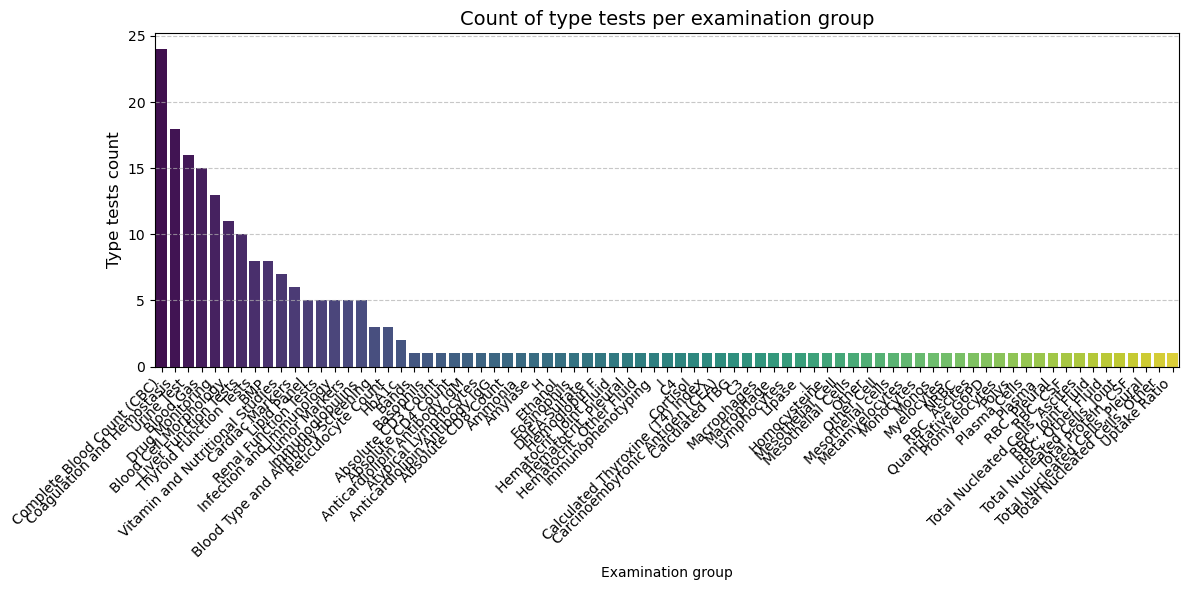

In [64]:
# Histogram per examination_group
tests_per_group = (
    df.groupby('examination_group')['label']
      .nunique()
      .sort_values(ascending=False)
      .reset_index(name='unique_test_count') 
)

plt.figure(figsize=(12, 6))

sns.barplot(
    data=tests_per_group, 
    x='examination_group', 
    y='unique_test_count', 
    palette='viridis',
    hue='examination_group', 
    legend=False
)

plt.title('Count of type tests per examination group', fontsize=14)
plt.xlabel('Examination group', fontsize=10)
plt.ylabel('Type tests count', fontsize=12)
plt.xticks(rotation=45, ha='right') 
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

### 1.3.1 Normalization

The only numerical attributes that we have are: `ref_range_lower`, `ref_range_upper`, `valuenum`. <br>
Before analysing their distributions we need to normalize them. 

#### 1.3.1.1 `valueuom` normalization

In this section we apply normalization (standardization) of `valueuom` w.r.t the unique tests.

In [65]:
# Identify unique tests (label, fluid) with multiple units of measurement (valueuom)
grouped = df.groupby(['label', 'fluid'])['valueuom']
multi = grouped.nunique()
multi = multi[multi > 1]

for label, fluid in multi.index:
    subset = df[(df['label'] == label) & (df['fluid'] == fluid)]
    print(f"Unique test: {label} - {fluid}")
    print(f"Number of units of measurement: {len(subset['valueuom'].unique())}")
    # for col in ['ref_range_lower', 'ref_range_upper']:
    #     vc = subset[col].value_counts()
    #     n_unique = vc.size
    #     print(f"  {col}: unique={n_unique}")
    print("-" * 60)


Unique test: D-Dimer - Blood
Number of units of measurement: 2
------------------------------------------------------------
Unique test: HIV 1 Viral Load - Blood
Number of units of measurement: 2
------------------------------------------------------------
Unique test: Heparin - Blood
Number of units of measurement: 2
------------------------------------------------------------
Unique test: MCHC - Blood
Number of units of measurement: 2
------------------------------------------------------------
Unique test: Protein/Creatinine Ratio - Urine
Number of units of measurement: 2
------------------------------------------------------------


In [66]:
#principal unit measure -> mode (the more frequent unit of measure for each label)
main_unit = (
    df.groupby(['label', 'fluid'])['valueuom']
      .agg(lambda x: x.mode()[0])
)

for label in multi.index:
    print (f"{label} : {main_unit[label]}")

('D-Dimer', 'Blood') : ng/mL
('HIV 1 Viral Load', 'Blood') : log10 cop/mL
('Heparin', 'Blood') : IU/mL
('MCHC', 'Blood') : %
('Protein/Creatinine Ratio', 'Urine') : Ratio


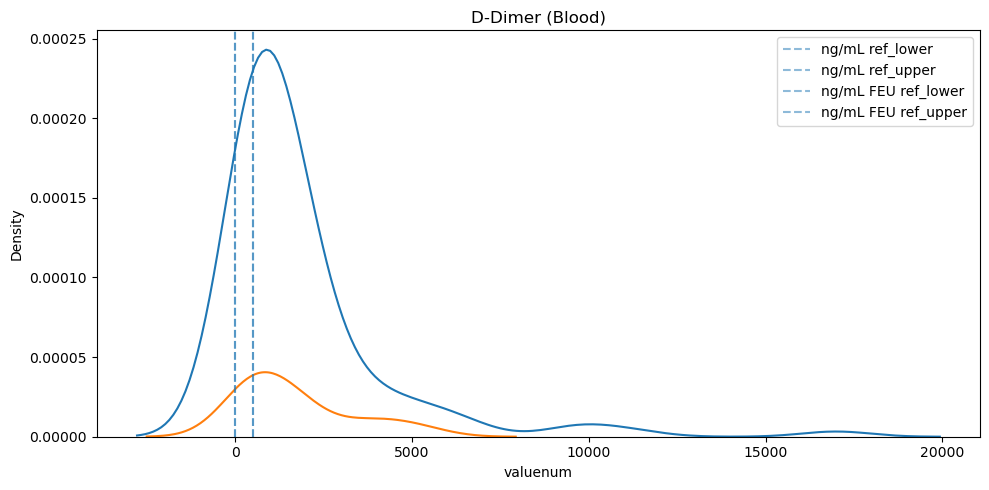

/tmp/ipykernel_72353/2326021144.py:9: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=subset, x='valuenum', hue='valueuom', ax=ax)


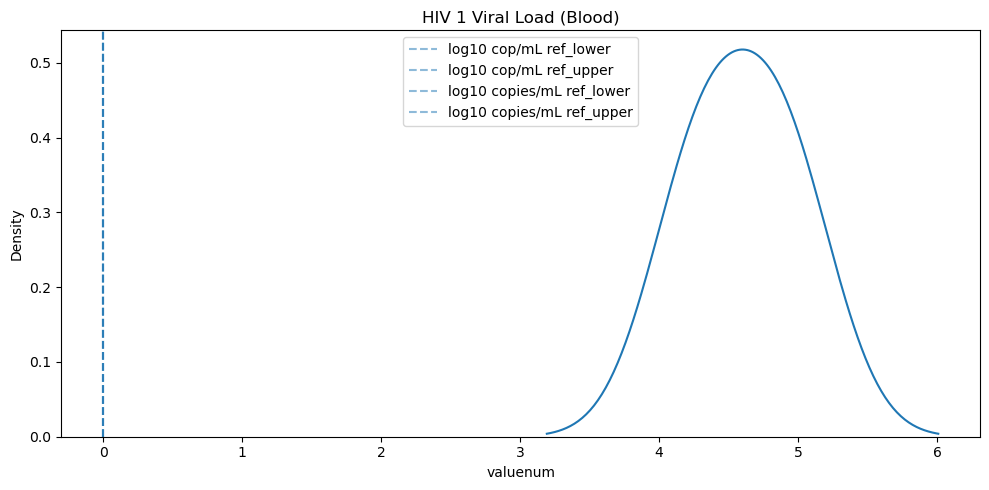

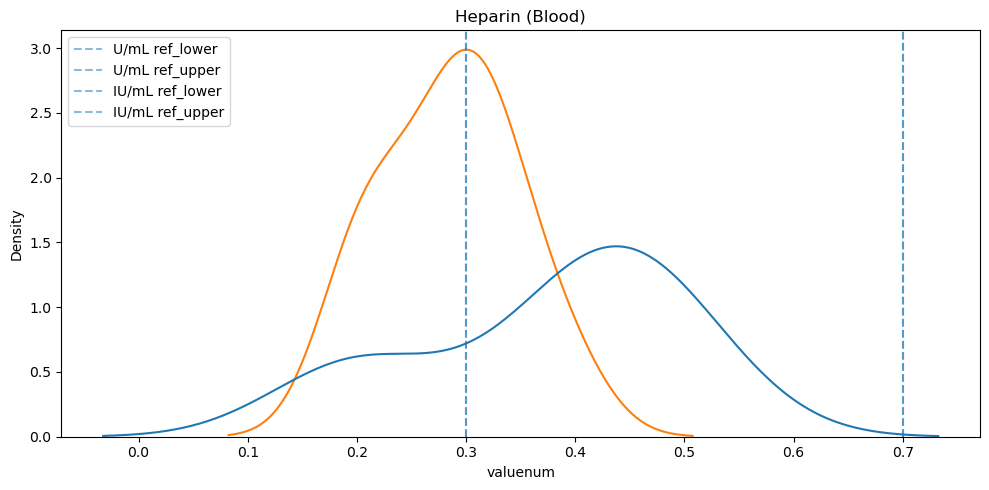

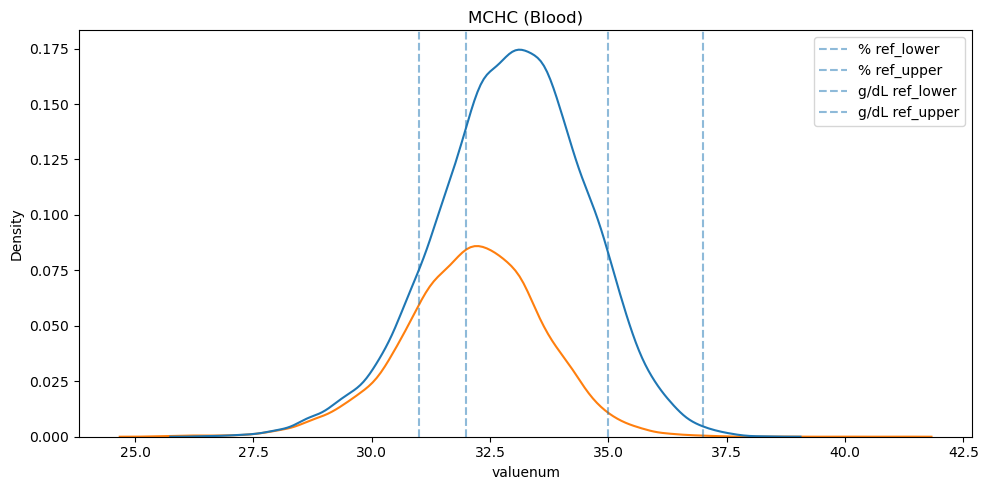

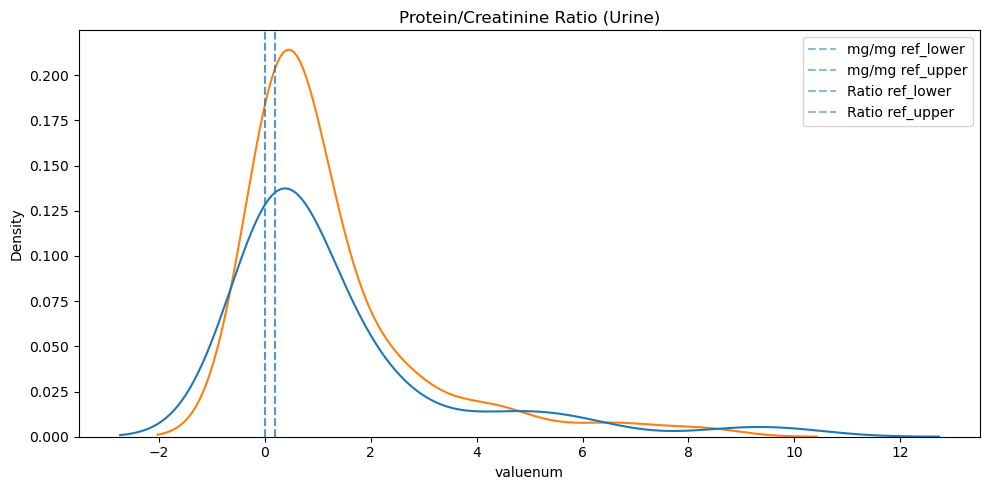

In [67]:
# Identify labels with multiple units of measurement and plot their distributions
grouped = df.groupby(['label', 'fluid'])['valueuom']
multi = grouped.nunique()
multi = multi[multi > 1]

for label, fluid in multi.index:
    subset = df[(df['label'] == label) & (df['fluid'] == fluid)]
    fig, ax = plt.subplots(figsize=(10, 5))
    sns.kdeplot(data=subset, x='valuenum', hue='valueuom', ax=ax)
    
    # Add reference range lines for each unit of measurement
    for uom in subset['valueuom'].unique():
        uom_data = subset[subset['valueuom'] == uom]
        ref_lower = uom_data['ref_range_lower'].iloc[0]
        ref_upper = uom_data['ref_range_upper'].iloc[0]
        ax.axvline(ref_lower, linestyle='--', alpha=0.5, label=f'{uom} ref_lower')
        ax.axvline(ref_upper, linestyle='--', alpha=0.5, label=f'{uom} ref_upper')
    
    ax.set_title(f'{label} ({fluid})')
    ax.legend()
    plt.tight_layout()
    plt.show()

In many of the graphs above, the different units of measurement for the unique tests match, so only the mode conversion occurs in the unit of measurement for that test. <br>
In the only case where we have two units of measurement with different ranges, we perform a standardization.

`Absolute Lymphocyte Count`: The `#/uL` means the amount of cells that are in one microliter. Meanwhile `K/uL` means thousands of cells in a microliter. <br>
We normalize only the `valuenum` in the unit of measurement represented by the mode (`K/uL`);

`D-dimer`: `ng/mL` and `ng/mL FEU` (Fibrinogen Equivalent Units) are the same unit, so we substitute for the mode of the unit;

`HIV 1 Viral Load`: the standard unit of measure is copies/mL. We don't need to normalize the data in this case because they are representing the same unit of measure;

`Heparin`: Both IU/mL and U/mL refer to the anticoagulant activity of heparin per milliliter of solution. <br>
"International Unit" (IU) is the official term established by the World Health Organization (WHO) to standardize the measurement of biological activities, including heparin. <br>
The abbreviation "U" is frequently used in clinical settings for simplicity and does not represent a different unit;

`MCHC`: `g/dL` is the standard unit for expressing the average concentration of hemoglobin in a volume of red blood cells. <br>
Meanwhile `%` is a percentage value of the hemoglobin concentration within the red blood cells and is numerically equivalent to the g/dL value. <br>
In conclusion, they are both equivalent. <br>
We take g/dL given that it's the mode and the standard unit of measure.
In this particular setting, we need to normalize the records put in `%` measure. 
The normalization applied is in the range of 32% and 36% (see <a href="https://en.wikipedia.org/wiki/Mean_corpuscular_hemoglobin_concentration" > Wiki</a>);

`Protein/Creatinine ratio`: The different `valueuom` (that is, `Ratio` and `mg/mg`) indicate the same measure, that is the protein/creatinine ratio in urine used to evaluate kidney function. We can substitute the `valueuom` of `mg/mg` into `Ratio` (the mode of this measure, in this particular label).

In [68]:
conversions = {
    'Absolute Lymphocyte Count': ('#/uL', 'K/uL', 1/1000),
    'D-Dimer': ('ng/mL FEU', 'ng/mL', 1),
    'HIV 1 Viral Load': ('log10 cop/mL', 'log10 copies/mL', 1),
    'Heparin': ('U/mL', 'IU/mL', 1),
    'Protein/Creatinine Ratio': ('mg/mg', 'Ratio', 1)
}

def convert_unit(df, label, old_uom, new_uom, factor=1.0):
    mask = (df["label"] == label) & (df["valueuom"] == old_uom)
    if mask.any():
        if factor != 1.0:
            df.loc[mask, "valuenum"] = df.loc[mask, "valuenum"] * factor

        df.loc[mask, "valueuom"] = new_uom
        print(f"[OK] {label}: converted '{old_uom}' -> '{new_uom}' (factor: {factor})")
    else:
        print(f"[SKIP] {label}: unit '{old_uom}' not found.")

In [69]:
def normalize_by_ref_range(df, label, from_uom, to_uom):
    """
    Run conversion based on reference ranges (MCHC -> from g/dL to %).
    """
    mask_from = (df["label"] == label) & (df["valueuom"] == from_uom)
    mask_to = (df["label"] == label) & (df["valueuom"] == to_uom)

    if not mask_from.any() or not mask_to.any():
        print(
            f"[SKIP] {label}: Missing data for conversion from '{from_uom}' to '{to_uom}'"
        )
        return

    try:
        ref_lower_target = df.loc[mask_to, "ref_range_lower"].iloc[0]
        ref_upper_target = df.loc[mask_to, "ref_range_upper"].iloc[0]

        ref_lower_source = df.loc[mask_from, "ref_range_lower"].iloc[0]
        ref_upper_source = df.loc[mask_from, "ref_range_upper"].iloc[0]

        # Scale factor (slope)
        # Formula: new_val = new_min + (val - old_min) * (new_range / old_range)
        scale_factor = (ref_upper_target - ref_lower_target) / (
            ref_upper_source - ref_lower_source
        )

        # Apply conversion
        df.loc[mask_from, "valuenum"] = (
            ref_lower_target
            + (df.loc[mask_from, "valuenum"] - ref_lower_source) * scale_factor
        )

        # Update unit measure and reference ranges
        df.loc[mask_from, "valueuom"] = to_uom
        df.loc[mask_from, "ref_range_lower"] = ref_lower_target
        df.loc[mask_from, "ref_range_upper"] = ref_upper_target

    except IndexError:
        print(f"[ERROR] {label}: Could not retrieve unique reference ranges.")

In [70]:
#Apply conversions
for label, params in conversions.items():
    old_uom, new_uom, factor = params
    convert_unit(df, label, old_uom, new_uom, factor)
    
normalize_by_ref_range(df, 'MCHC', from_uom='g/dL', to_uom='%')

[SKIP] Absolute Lymphocyte Count: unit '#/uL' not found.
[OK] D-Dimer: converted 'ng/mL FEU' -> 'ng/mL' (factor: 1)
[OK] HIV 1 Viral Load: converted 'log10 cop/mL' -> 'log10 copies/mL' (factor: 1)
[OK] Heparin: converted 'U/mL' -> 'IU/mL' (factor: 1)
[OK] Protein/Creatinine Ratio: converted 'mg/mg' -> 'Ratio' (factor: 1)


In [71]:
grouped_check = df.groupby(['label', 'fluid'])['valueuom'].nunique()
duplicates = grouped_check[grouped_check > 1]

if duplicates.empty:
    print("All units are now standardized per label/fluid.")
else:
    print(f"Still found mixed units for: {duplicates.index.tolist()}")

All units are now standardized per label/fluid.


#### 1.3.1.2 Normalization of `ref_range_lower` and `ref_range_upper`

We did not normalize the reference ranges so as not to lose the clinical specificity related to the age of the patients. <br>
Below are some histograms to show the frequency distribution of the different ranges by type of test and by type of examination group.

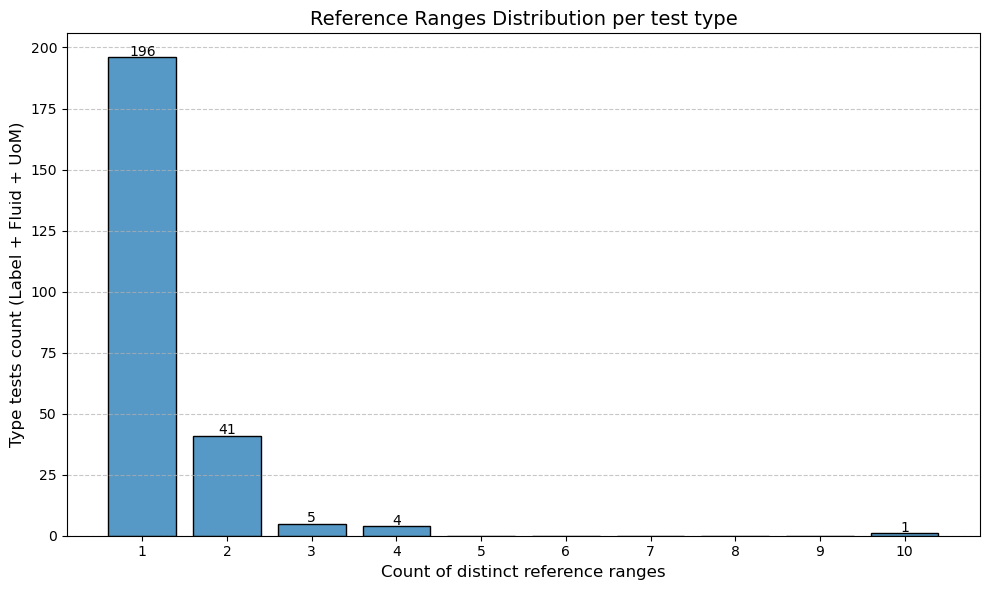

In [72]:
# Verifica unique test che presentano più di una coppia (ref_range_lower, ref_range_upper)
range_counts = (
    df.groupby(['label', 'fluid', 'valueuom'])[['ref_range_lower', 'ref_range_upper']]
      .apply(lambda g: g.drop_duplicates().shape[0])
      .rename('n_distinct_ranges')
)

plt.figure(figsize=(10, 6))
ax = sns.histplot(range_counts, discrete=True, shrink=0.8)
plt.title('Reference Ranges Distribution per test type', fontsize=14)
plt.xlabel('Count of distinct reference ranges', fontsize=12)
plt.ylabel('Type tests count (Label + Fluid + UoM)', fontsize=12)
plt.xticks(range(1, range_counts.max() + 1)) # Forza mostrare tutti i numeri interi sull'asse X
plt.grid(axis='y', linestyle='--', alpha=0.7)
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(p.get_x() + p.get_width() / 2., height + 0.5, int(height), ha="center")
plt.tight_layout()
plt.show()

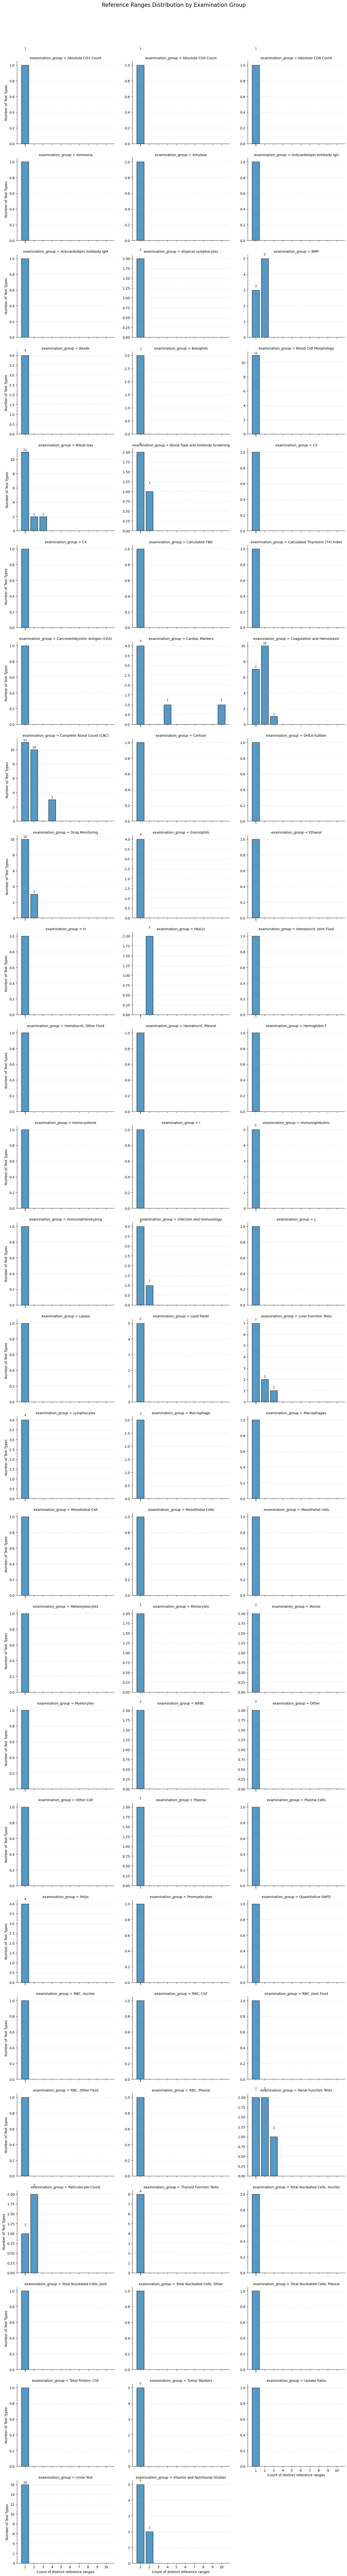

In [73]:
range_counts_df = (
    df.groupby(['examination_group', 'label', 'fluid', 'valueuom'])[['ref_range_lower', 'ref_range_upper']]
      .apply(lambda g: g.drop_duplicates().shape[0])
      .reset_index(name='n_distinct_ranges') #Dataframe transformation for seaborn
)

def annotate_bars(ax):
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.text(
                p.get_x() + p.get_width() / 2,
                height + 0.2,
                int(height),
                ha='center',
                fontsize=9,
                color='black'
            )

g = sns.FacetGrid(
    data=range_counts_df,
    col='examination_group',
    col_wrap=3,
    height=4,
    aspect=1.2,
    sharey=False
)

g.map_dataframe(
    sns.histplot,
    x='n_distinct_ranges',
    discrete=True,
    shrink=0.8
)

for ax in g.axes.flat:
    annotate_bars(ax)

    max_x = int(range_counts_df['n_distinct_ranges'].max())
    ax.set_xticks(range(1, max_x + 1))
    ax.grid(axis='y', linestyle='--', alpha=0.5)

g.set_axis_labels("Count of distinct reference ranges", "Number of Test Types")
g.figure.suptitle('Reference Ranges Distribution by Examination Group', fontsize=16, y=1.02)

plt.show()

#### 1.3.1.3 All other attribute's normalization

### 1.3.2 Detect outliers 

righe in agg: 247
coppie (label, fluid) uniche: 247


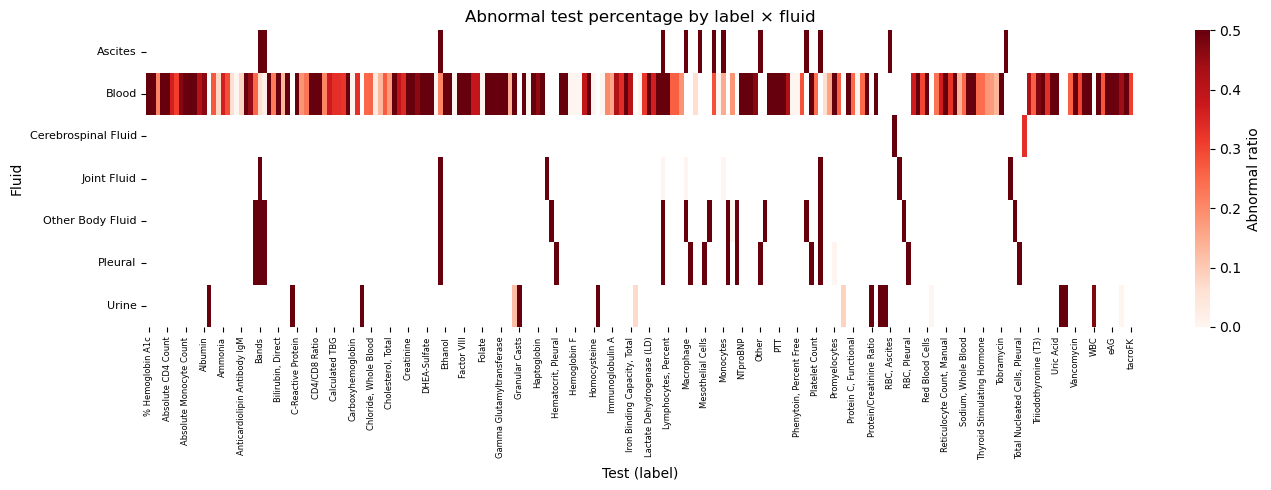

In [74]:
#Build heatmap of abnormal ratio per unique test (label x fluid)
agg = (
    df
    .groupby((['label', 'fluid']))
    .agg(
        total_tests = ('valuenum', 'size'),
        abnormal_tests = ('flag', 'sum')
        )
    )

agg['abnormal_ratio'] = agg['abnormal_tests'] / agg['total_tests']
agg.sort_values(by='abnormal_ratio', ascending=False)
tmp = agg.reset_index()

print("righe in agg:", len(tmp))
print("coppie (label, fluid) uniche:", len(tmp[['label', 'fluid']].drop_duplicates()))

# pivot per la heatmap: righe = fluid, colonne = label
heat_pivot = agg.reset_index().pivot(index='fluid', columns='label', values='abnormal_ratio')


#heatmap abnormal ratio for every unique test (label x fluid)
plt.figure(figsize=(14, 5))
sns.heatmap(
    heat_pivot,
    annot=False,          
    cmap="Reds",
    cbar_kws={'label': 'Abnormal ratio'},
    vmax=0.5
)

plt.xticks(rotation=90, fontsize=6)
plt.yticks(fontsize=8)
plt.title("Abnormal test percentage by label × fluid", fontsize=12)
plt.xlabel("Test (label)")
plt.ylabel("Fluid")
plt.tight_layout()
plt.show()

<b>Heatmap Interpretation</b>
<ul>
    <li>Column = test (label).</li>
    <li>Row = fluid.</li>
    <li>Each colored vertical bar = how often that test is abnormal on that fluid.</li>
    <li>The darker the color, the higher the percentage of abnormal results in that group.</li>   
</ul>

In Blood, some tests often have abnormal values ​​(very dark columns). <br>
For other fluids, you have few tests but with very high ratios (e.g., very few tests, almost all abnormal).

Another thing we can note is the large number of tests available for the fluid type "Blood." We can analyze the test distributions by fluid type to confirm this statement.

/tmp/ipykernel_72353/1134927228.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


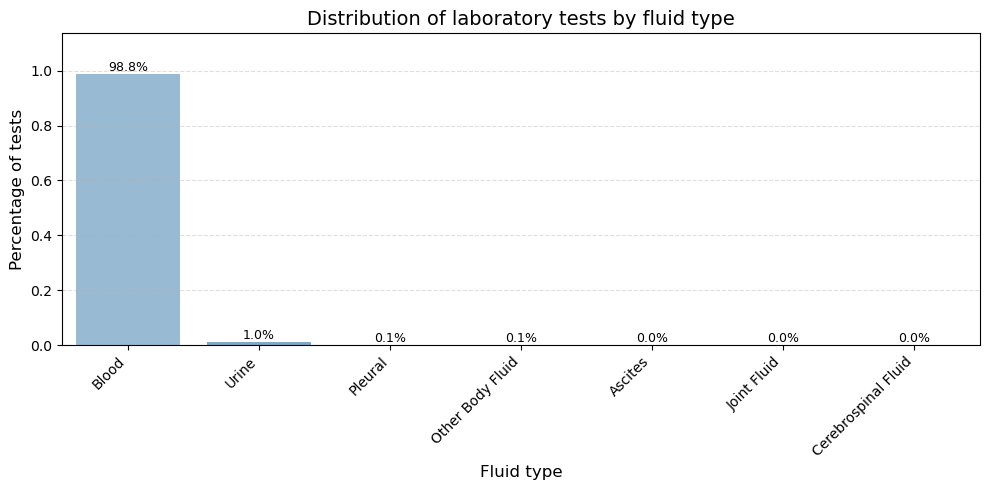

In [75]:
# Test distribution by fluid type
tests_per_fluid = (
    df.groupby('fluid')
      .size()
      .rename('n_tests')
      .reset_index()
      .sort_values('n_tests', ascending=False)
)

# Percentage on total tests
total_tests = tests_per_fluid['n_tests'].sum()
tests_per_fluid['perc'] = tests_per_fluid['n_tests'] / total_tests

# Percentage column rounded for labels
tests_per_fluid['perc_label'] = (tests_per_fluid['perc'] * 100).round(1)

plt.figure(figsize=(10, 5))
ax = sns.barplot(
    data=tests_per_fluid,
    x='fluid',
    y='perc',
    palette='Blues_d'
)

# label above percentage bars
for p, perc in zip(ax.patches, tests_per_fluid['perc_label']):
    ax.text(
        x=p.get_x() + p.get_width() / 2,
        y=p.get_height(),
        s=f'{perc}%',
        ha='center',
        va='bottom',
        fontsize=9
    )

ax.set_title('Distribution of laboratory tests by fluid type', fontsize=14)
ax.set_xlabel('Fluid type', fontsize=12)
ax.set_ylabel('Percentage of tests', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, tests_per_fluid['perc'].max() * 1.15) 
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()
 

Since almost all laboratory tests are performed on blood, while other fluids have a very small number of observations, focusing the analysis only on blood allows us to work with numerically consistent data and avoid weak conclusions about rarely tested fluids.

In [ ]:
df_blood = df[df['fluid'] == 'Blood'].copy()

,label,fluid,valueuom,hadm_id,charttime,valuenum,ref_range_lower,ref_range_upper,flag,examination_group,analysis_batch_id,qc_flag
0,Creatine Kinase (CK),Blood,IU/L,29654838,2188-01-04 23:43:00,198.00,29.0,201.00,0,Cardiac Markers,BATCH_218801_N3,OK
1,"Creatine Kinase, MB Isoenzyme",Blood,ng/mL,29654838,2188-01-04 23:43:00,5.00,0.0,10.00,0,Cardiac Markers,BATCH_218801_C7,OK
2,Troponin T,Blood,ng/mL,29654838,2188-01-04 23:43:00,0.03,0.0,0.01,1,Cardiac Markers,BATCH_218801_R4,OK
3,PT,Blood,sec,29654838,2188-01-05 06:56:00,12.80,9.4,12.50,1,Coagulation and Hemostasis,BATCH_218801_B1,WARN
4,PTT,Blood,sec,29654838,2188-01-05 06:56:00,85.80,25.0,36.50,1,Coagulation and Hemostasis,BATCH_218801_R1,OK
...,...,...,...,...,...,...,...,...,...,...,...,...
857615,Platelet Count,Blood,K/uL,21557581,2145-08-02 08:30:00,180.00,150.0,400.00,0,Complete Blood Count (CBC),BATCH_214508_B1,OK
857616,RDW,Blood,%,21557581,2145-08-02 08:30:00,14.50,10.5,15.50,0,Complete Blood Count (CBC),BATCH_214508_H5,OK
857617,Red Blood Cells,Blood,m/uL,21557581,2145-08-02 08:30:00,3.26,3.9,5.20,1,Complete Blood Count (CBC),BATCH_214508_N7,OK
857618,White Blood Cells,Blood,K/uL,21557581,2145-08-02 08:30:00,8.40,4.0,10.00,0,Complete Blood Count (CBC),BATCH_214508_Y6,OK


The outlier detection have to be performed only to `valuenum` numerical value, in order to find errors on tests. <br>
Outliers should be displayed by the test `label` now, because before we implictly standardize the `fluid` into `Blood`.

In [77]:
def flag_outliers_iqr(g):
    q1 = g['valuenum'].quantile(0.25)
    q3 = g['valuenum'].quantile(0.75)
    iqr = q3 - q1
    lo = q1 - 1.5 * iqr
    hi = q3 + 1.5 * iqr
    return (g['valuenum'] < lo) | (g['valuenum'] > hi)

In [85]:
df_blood['is_outlier_iqr'] = (
    df_blood
    .groupby('label', group_keys=False)
    .apply(flag_outliers_iqr)
)

/tmp/ipykernel_72353/1177423822.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(flag_outliers_iqr)


In [79]:
# Define condition error for the outliers based on reference ranges and on flag/qc_flag
k = 5
cond_range = (
    (df_blood['valuenum'] < 0)
    |
    (
        df_blood['ref_range_lower'].notna()
        & 
        ((df_blood['valuenum'] > k * df_blood['ref_range_upper'])
           | (df_blood['valuenum'] < (1/k) * df_blood['ref_range_lower'])
        )
    )
)

cond_flag = (
    (df_blood['qc_flag'] != 'OK')     
)


for each test we calculate the percentage of measurements marked as suspicious errors.

In [80]:
df_blood['suspected_error'] = (
    df_blood['is_outlier_iqr'] &
    cond_range & 
    cond_flag  
)

mean_errors = df_blood.groupby('label')['suspected_error'].mean()
low  = mean_errors[mean_errors < 0.001]
mid  = mean_errors[(mean_errors >= 0.001) & (mean_errors <= 0.05)]
high = mean_errors[mean_errors > 0.05]
print (f"{len(low)} tests with low suspected errors.")
print (f"{len(mid)} tests with mid suspected errors.")
print (f"{len(high)} tests with high suspected errors.")


150 tests with low suspected errors.
23 tests with mid suspected errors.
2 tests with high suspected errors.


 We decide for the moment to remove only the records with suspicious values from the all records.

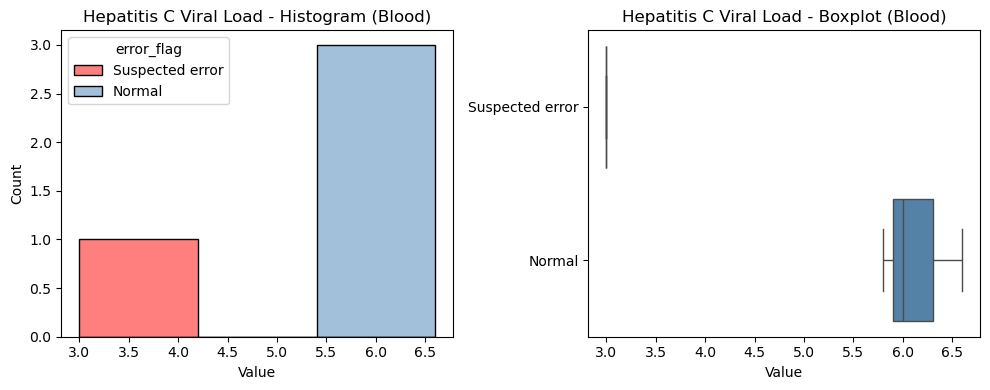

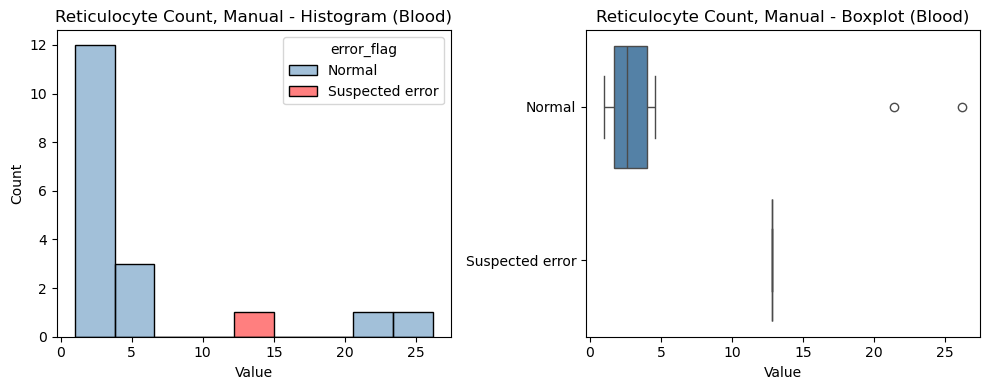

In [81]:
for lab in high.index:
    subset = df_blood[df_blood['label'] == lab].copy()

    # Colonna categoriale leggibile per hue / y
    subset['error_flag'] = subset['suspected_error'].map(
        {False: 'Normal', True: 'Suspected error'}
    )

    plt.figure(figsize=(10, 4))

    # Istogramma
    plt.subplot(1, 2, 1)
    sns.histplot(
        data=subset,
        x='valuenum',
        hue='error_flag',
        multiple='layer',
        palette={'Normal': 'steelblue', 'Suspected error': 'red'}, 
        kde=False, 
    )
    plt.title(f'{lab} - Histogram (Blood)')
    plt.xlabel('Value')
    plt.ylabel('Count')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(
        data=subset,
        x='valuenum',
        hue='error_flag',
        y='error_flag',
        orient='h',
        palette={'Normal': 'steelblue', 'Suspected error': 'red'},
        legend=False
    )
    plt.title(f'{lab} - Boxplot (Blood)')
    plt.xlabel('Value')
    plt.ylabel('')

    plt.tight_layout()
    plt.show()


In [82]:
print("Total rows in df_blood:", len(df_blood))
df_blood_clean = df_blood[~df_blood['suspected_error']].copy()
print("Total rows after clean:", len(df_blood_clean))

Total rows in df_blood: 847077
Total rows after clean: 846463


We don't loose so much records

### 1.3.3 Feature projection

At this point, we can extract interesting characteristics from the test groups involving a single hospital admission.

These characteristics will then provide important information when building the patient profile.

<ul>We define: 
<li>Total count of laboratory events linked to the admission</li>
<li>Percentage of invalid test per admission</li>
</ul>

In [88]:
hadm_tests = (
    df_blood_clean
    .groupby('hadm_id')
    .agg(
        total_tests=('valuenum', 'size'),              
        n_invalid=('flag', 'sum'),
        n_days_span=('charttime', lambda x: (x.max() - x.min()).days)       
    )
    .assign(
        perc_invalid=lambda x: x['n_invalid'] / x['total_tests']  
    )
    .reset_index()
)

hadm_tests


,hadm_id,total_tests,n_invalid,n_days_span,perc_invalid
0,20004456,79,40,2,0.506329
1,20007905,188,52,3,0.276596
2,20013519,82,28,2,0.341463
3,20013602,58,10,1,0.172414
4,20014999,272,81,7,0.297794
...,...,...,...,...,...
4746,29991470,66,20,3,0.303030
4747,29995484,159,62,3,0.389937
4748,29996728,432,237,14,0.548611
4749,29998994,40,7,1,0.175000


In [ ]:
hadm_tests.to_csv(notebook_dir.parents[1] / "Custom" / "laboratory_tests_summary.csv", index=False)